# Prepare Effelsberg M81 data

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [9]:
#Load the data from a specific burst
datadir = "/mnt/c/Users/Mariska Hoogkamer/Documents/UvA/FRBs/data/data_Effelsberg_M81/M81_numpy_profiles_Jan14-Mar17/"
resdir = "/mnt/c/Users/Mariska Hoogkamer/Documents/UvA/FRBs/data/data_Effelsberg_M81/M81_data/"

### Explore data

In [10]:
file = "B20_Jan14_profile.npy"
data = np.load(datadir + file) # Jansky (spectral flux density)

dt = 0.00512 #5.12us resolution (except B2 on Jan 14 and B1,B2 on Feb21 which are all 40.96us resolution)
time = np.arange(0, dt*len(data), dt)

# Convert into pandas dataframe 
df = pd.DataFrame(time, columns=['time'])
df['ytrue'] = data # snr 
df['yerr'] = 1.0e0 # snr errors 

# # convert dataframe to .dat file 
# df.to_csv(resdir + file[:-4] + '.dat', sep=" ", index=False, header=False)

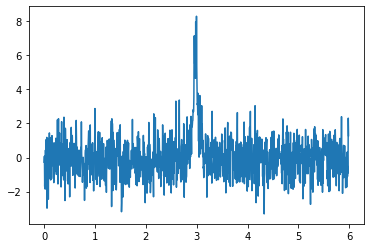

In [11]:
plt.plot(time, data)

In [8]:
# For all the M81 bursts 
for file in glob.glob(datadir + "*.npy"):
    data = np.load(file) # Jansky (spectral flux density)

    dt = 0.00512 #5.12us resolution (except B2 on Jan 14 and B1,B2 on Feb21 which are all 40.96us resolution)
    time = np.arange(0, dt*len(data), dt)

    # Convert into pandas dataframe 
    df = pd.DataFrame(time, columns=['time'])
    df['ytrue'] = data # snr values
    df['yerr'] = 1.0e0 # snr errors 

    filename = file.removesuffix("_profile.npy")
    # convert dataframe to .dat file 
    df.to_csv(f"{filename}.dat", sep=" ", index=False, header=False)

# Apply downsampling

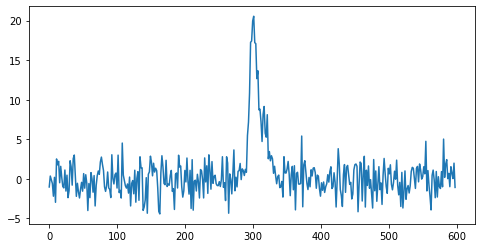

In [29]:
#Load the data from a specific burst
datadir = "/home/mariska/UvA/magnetron2/data/M81_numpy_profiles/"
resdir = "/home/mariska/UvA/magnetron2/data/M81_data/"

file = "B16_Jan14_profile.npy"
data = np.load(datadir + file) # Jansky (spectral flux density)
data = data[::3] + data[1::3] + data[2::3] # apply downsampling 

fac = 3 # downsampling factor 

dt = fac*0.512 #5.12us resolution (except B2 on Jan 14 and B1,B2 on Feb21 which are all 40.96us resolution)
# CHANGE TO 0.00512 if you want it in miliseconds 
time = np.arange(0, dt*len(data), dt)

# Convert into pandas dataframe 
df = pd.DataFrame(time, columns=['time'])
df['ytrue'] = data # flux values
df['yerr'] = 1.0e0 # flux errors 

fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.plot(time, data)

# convert dataframe to .dat file 
df.to_csv(resdir + file[:-4] + '3.dat', sep=" ", index=False, header=False)